# Optical Character Recognition(OCR)

Optical Character Recognition (OCR) is the conversion of images of typed, handwritten or printed text into machine-encoded text, whether from a scanned document, a photo of a document. OCR is a step by step process which includes following steps:

1. Pre-processing
2. Text detection
3. Text recognition
4. Post processing
    
This steps changes depending on the application. **Tesseract OCR** is a library used directly or as an API to extract printed text from images. When using Tesseract we don't have to worry about most of these steps. So let's see how tesseact ocr works.

## What is Tesseract ?

Tesseract supports a wide variety of languages. Tesseract doesn’t have a built-in GUI, but there are several available from the 3rdParty page. Tesseract is compatible with many programming languages and frameworks through wrappers. You can find all these details [here](https://tesseract-ocr.github.io/tessdoc/AddOns). 

## Where it is used ?


 For almost two decades, optical character recognition systems have been widely used to provide automated text entry into computerized systems. Yet in all this time, conventional OCR systems have never overcome their inability to read more than a handful of type fonts and page formats. Proportionally spaced type (which includes virtually all typeset copy), laser printer fonts, and even many non-proportional typewriter fonts, have remained beyond the reach of these systems. And as a result, conventional OCR has never achieved more than a marginal impact on the total number of documents needing conversion into digital form.
 
 
![](../images/ocr.jpg)

## Installing the library

Get the installer file [here](https://github.com/UB-Mannheim/tesseract/wiki). Open the executable file and install it and don't forget to add it's path to Environment variable, we also install the wrapper over tesseract known as Pytesseract. It can read all image types supported by the Pillow and Leptonica imaging libraries, including jpeg, png, gif, bmp, tiff, and others. Using following command we can install the library. The command is OS independent and succesfully installs the library.

```bash
> pip install pytesseract
```

In [3]:
import cv2
import pytesseract
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

custom_config = r'--oem 3 --psm 6'

Lets write a simple helper function to plot image

In [31]:
def plot(img, title=None):
    plt.figure(figsize = (7,10))
    if title: plt.title(title)
    else: plt.title('Original Image')
    plt.axis(False)
    plt.imshow(img);

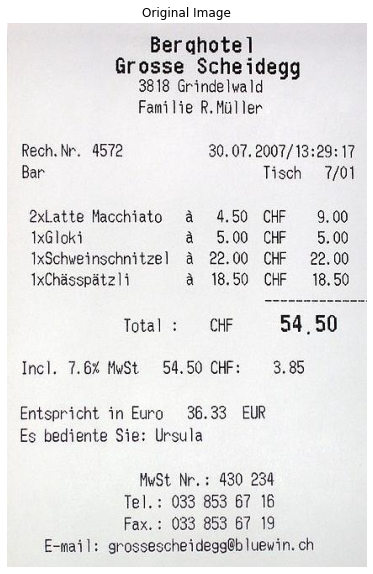

In [5]:
image = cv2.imread('images/bill.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plot(image)

In [7]:
text = pytesseract.image_to_string(image, config=custom_config)
print(text)

Berghotel
Grosse Scheidegg
3818 Grindelwald
Familie R. Miller
Rech. Nr. 4572 30, 07. 2007/ 13:29: 17
Bar Tisch 7/01
2xLatte Macchiato a 4.50 CHF 9.00
IxGloki a 5.00 CHF 5.00
IxSchweinschnitzel a 22.00 CHF 22.00
IxChasspatz li a 18.50 CHF 18.50
Total: CHF 54.50
Incl. 7.6% MwSt 54.50 CHF: 3.85
Entspricht in Euro 36.33 EUR
Es bediente Sie: Ursula
MwSt Nr. 430 234
Tel.: 033 853 67 16
Fax.: 033 853 67 19
E-mail: grossescheidegg@b |uewin. ch



From above image we can say that tesseract performs well on the image we have provided. 

Sometimes the text in the image is not very readable. So, we have to process our image before we can extract text from it. We can use all the techniques that we learned in this course. Lets have a look

In [13]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def remove_noise(image):
    return cv2.medianBlur(image,3)
 
def thresholding(image):
    return cv2.adaptiveThreshold(image, 255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 25, 3)

def canny(image):
    return cv2.Canny(image, 50, 200)

def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

In [10]:
gray = grayscale(image)
print(pytesseract.image_to_string(gray))

Berghotel
Grosse Scheidegg
3818 Grindelwald
Familie R. Miller

Rech.Nr. 4572 30. 07. 2007/13:29: 17
Bar Tisch 7/01

2xLatte Macchiato a@ 4.50 CHF 9.00
IxGloki a 5.00 CHF 5.00
IxSchweinschnitzel a 22.00 CHF 22.00
IxChasspatz |i a 18.50 CHF 18.50

Total: CHF 54.50
Incl. 7.6% MwSt 54.50 CHF: 3.85

Entspricht in Euro 36.33 EUR
Es bediente Sie: Ursula

MwSt Nr. : 430 234
Tel.: 033 853 67 16
Fax.: 033 853 67 19
E-mail: grossescheidegg@b |uewin. ch



In [14]:
deskew_img = deskew(gray)
print(pytesseract.image_to_string(deskew_img))

Berghotel
Grosse Scheidegg
3818 Grindelwald
Familie R. Miller

Rech.Nr. 4572 30. 07. 2007/13:29: 17
Bar Tisch 7/01

2xLatte Macchiato a@ 4.50 CHF 9.00
IxGloki a 5.00 CHF 5.00
IxSchweinschnitzel a 22.00 CHF 22.00
IxChasspatz |i a 18.50 CHF 18.50

Total: CHF 54.50
Incl. 7.6% MwSt 54.50 CHF: 3.85

Entspricht in Euro 36.33 EUR
Es bediente Sie: Ursula

MwSt Nr. : 430 234
Tel.: 033 853 67 16
Fax.: 033 853 67 19
E-mail: grossescheidegg@b |uewin. ch



In above image we can see it gives the same result as above because even after converting it to ```grayscale``` . Similarly our image is ```already deskewed``` so it will also remains the same. 

Try using `removing noise`,  `thresholding` and `canny` functions for preprocessing and look at the output. Not all operations will give you expected output. So, tell us which technique performs the worst.

**Getting a box arround the text**

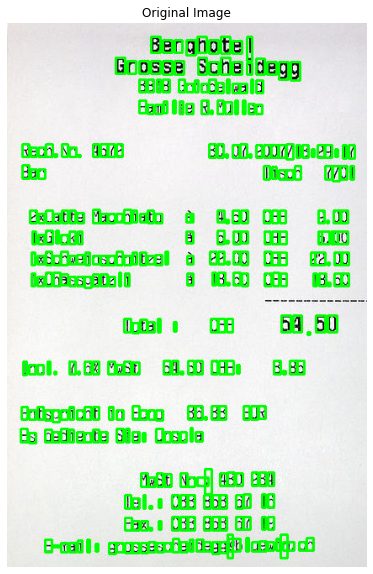

In [33]:
img = cv2.imread('images/bill.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 
for b in boxes.splitlines():
    b = b.split(' ')[1:-1]
    b = list(map(int, b))
    img = cv2.rectangle(img, (b[0], h-b[1]), (b[2], h-b[3]), (0, 255, 0), 2)
    
plot(img)

If you want boxes around words instead of characters, the function ```image_to_data``` will come in handy. You can use the ```image_to_data``` function with output type specified with pytesseract Output.

In [34]:
from pytesseract import Output

img = cv2.imread('images/bill.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


Using this dictionary, we can get each word detected, their bounding box information, the text in them and the confidence scores for each.

We can plot the boxes by using the code below -

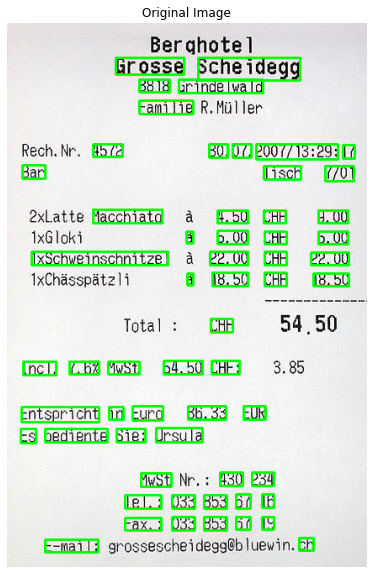

In [35]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
plot(img)

## Text template matching

Take the example of trying to find where are numbers in an image. Here our template will be a regular expression pattern that we will match with our OCR results to find the appropriate bounding boxes. We will use the ```regex``` module and the ```image_to_data``` function for this.

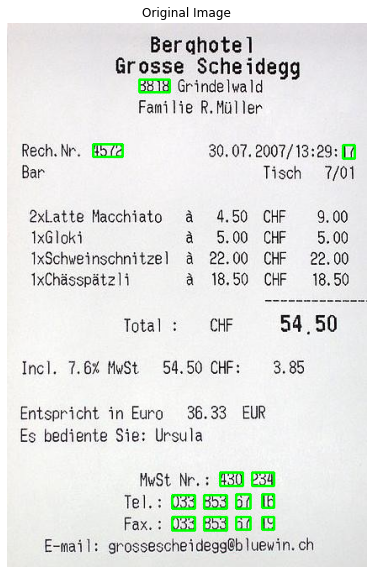

In [36]:
import re

img = cv2.imread('images/bill.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

d = pytesseract.image_to_data(img, output_type=Output.DICT)
pattern = '^[0-9]*$'

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
    	if re.match(pattern, d['text'][i]):
	        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
	        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

plot(img)

## Limitations of Tesseract

Tesseract works best when there is a clean segmentation of the foreground text from the background. In practice, it can be extremely challenging to guarantee these types of setup. There are a variety of reasons you might not get good quality output from Tesseract like if the image has noise on the background. The better the image quality (size, contrast, lightning) the better the recognition result.

Tesseract limitations are summed in the list.

- The OCR is not as accurate as some commercial solutions available to us.
- Doesn't do well with images affected by artifacts including partial occlusion, distorted perspective, and complex background.
- It is not capable of recognizing handwriting.
- It may find gibberish and report this as OCR output.
- If a document contains languages outside of those given in the -l LANG arguments, results may be poor.